## **HTRU2 Data Set**

#### Описание данных - https://archive.ics.uci.edu/ml/datasets/HTRU2

### Data Set Information:

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South) [1].

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter (see [2] for more uses).

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation (see [2] for an introduction to pulsar astrophysics to find out why). Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,
(see [4,5,6,7,8,9]) which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class. At present multi-class labels are unavailable, given the costs associated with data annotation.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

The data is presented in two formats: CSV and ARFF (used by the WEKA data mining tool). Candidates are stored in both files in separate rows. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

Please note that the data contains no positional information or other astronomical details. It is simply feature data extracted from candidate files using the PulsarFeatureLab tool (see [10]).

### Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency (see [3] for more details). The remaining four variables are similarly obtained from the DM-SNR curve (again see [3] for more details). These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

HTRU 2 Summary  
17,898 total examples.  
1,639 positive examples.  
16,259 negative examples.  

### Подключение библиотек и скриптов

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:72,5% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Пути к директориям и файлам

In [5]:
TRAIN_DATASET_PATH = './HTRU2/HTRU_2.csv'

### Загрузка данных

In [6]:
data = pd.read_csv(TRAIN_DATASET_PATH)

### Изучение датасета

In [7]:
data.head()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.50781,58.88243,0.46532,-0.51509,1.67726,14.86015,10.57649,127.39358,0
1,103.01562,39.34165,0.32333,1.05116,3.12124,21.74467,7.73582,63.17191,0
2,136.75000,57.17845,-0.06841,-0.63624,3.64298,20.95928,6.89650,53.59366,0
3,88.72656,40.67223,0.60087,1.12349,1.17893,11.46872,14.26957,252.56731,0
4,93.57031,46.69811,0.53190,0.41672,1.63629,14.54507,10.62175,131.39400,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   140.5625      17897 non-null  float64
 1   55.68378214   17897 non-null  float64
 2   -0.234571412  17897 non-null  float64
 3   -0.699648398  17897 non-null  float64
 4   3.199832776   17897 non-null  float64
 5   19.11042633   17897 non-null  float64
 6   7.975531794   17897 non-null  float64
 7   74.24222492   17897 non-null  float64
 8   0             17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [9]:
data.rename(columns={'140.5625': 'Mean of the integrated profile',
                     '55.68378214': 'Standard deviation of the integrated profile',
                     '-0.234571412': 'Excess kurtosis of the integrated profile',
                     '-0.699648398': 'Skewness of the integrated profile',
                     '3.199832776': 'Mean of the DM-SNR curve',
                     '19.11042633': 'Standard deviation of the DM-SNR curve',
                     '7.975531794': 'Excess kurtosis of the DM-SNR curv',
                     '74.24222492': 'Skewness of the DM-SNR curve',
                     '0': 'target'}, inplace=True)
# 1. Mean of the integrated profile - Среднее значение интегрированного профиля
# 2. Standard deviation of the integrated profile - Стандартное отклонение интегрированного профиля
# 3. Excess kurtosis of the integrated profile - Чрезмерный эксцесс интегрированного профиля
# 4. Skewness of the integrated profile - Асимметрия интегрированного профиля
# 5. Mean of the DM-SNR curve - Среднее значение кривой DM-SNR
# 6. Standard deviation of the DM-SNR curve - Стандартное отклонение кривой DM-SNR
# 7. Excess kurtosis of the DM-SNR curve - Избыточный эксцесс кривой DM-SNR
# 8. Skewness of the DM-SNR curve - Асимметрия кривой DM-SNR.
# 9. target - Целевая переменная.

In [10]:
data.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curv,Skewness of the DM-SNR curve,target
17892,136.42969,59.84742,-0.18785,-0.73812,1.29682,12.16606,15.45026,285.93102,0
17893,122.55469,49.48561,0.12798,0.32306,16.40970,44.62689,2.94524,8.29709,0
17894,119.33594,59.93594,0.15936,-0.74303,21.43060,58.87200,2.49952,4.59517,0
17895,114.50781,53.90240,0.20116,-0.02479,1.94649,13.38173,10.00797,134.23891,0
17896,57.06250,85.79734,1.40639,0.08952,188.30602,64.71256,-1.59753,1.42948,0


data.info()

In [11]:
print(data.shape)

(17897, 9)


### Количественные переменные

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17897.00000,111.07832,25.65271,5.81250,100.92969,115.07812,127.08594,192.61719
Standard deviation of the integrated profile,17897.00000,46.54902,6.84304,24.77204,42.37543,46.94644,51.02289,98.77891
Excess kurtosis of the integrated profile,17897.00000,0.47790,1.06406,-1.87601,0.02711,0.22324,0.47335,8.06952
Skewness of the integrated profile,17897.00000,1.77042,6.16806,-1.79189,-0.18853,0.19874,0.92821,68.10162
Mean of the DM-SNR curve,17897.00000,12.61493,29.47364,0.21321,1.92308,2.80184,5.46488,223.39214
Standard deviation of the DM-SNR curve,17897.00000,26.32692,19.47104,7.37043,14.43733,18.45998,28.42815,110.64221
Excess kurtosis of the DM-SNR curv,17897.00000,8.30357,4.50622,-3.13927,5.78149,8.43387,10.70297,34.53984
Skewness of the DM-SNR curve,17897.00000,104.85942,106.51727,-1.97698,34.95712,83.06900,139.31090,1191.00084
target,17897.00000,0.09158,0.28844,0.00000,0.00000,0.00000,0.00000,1.00000


### Целевая переменная

In [13]:
data['target'].value_counts()

0    16258
1     1639
Name: target, dtype: int64

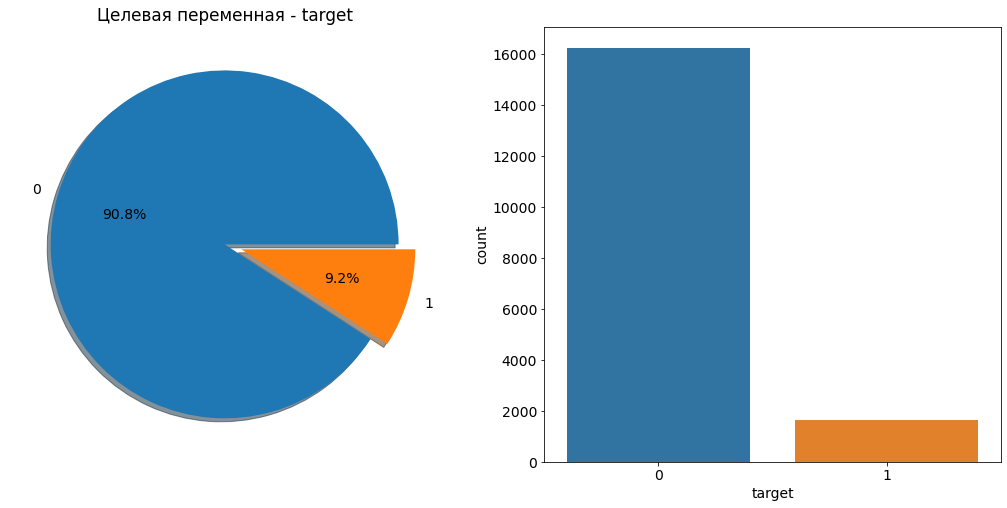

In [14]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
data['target'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Целевая переменная - target')
ax[0].set_ylabel('')
sns.countplot('target', data=data, ax=ax[1])
plt.show()

###  Обработка выбросов и пропусков

In [15]:
data.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curv              0
Skewness of the DM-SNR curve                    0
target                                          0
dtype: int64

### Корреляция признаков

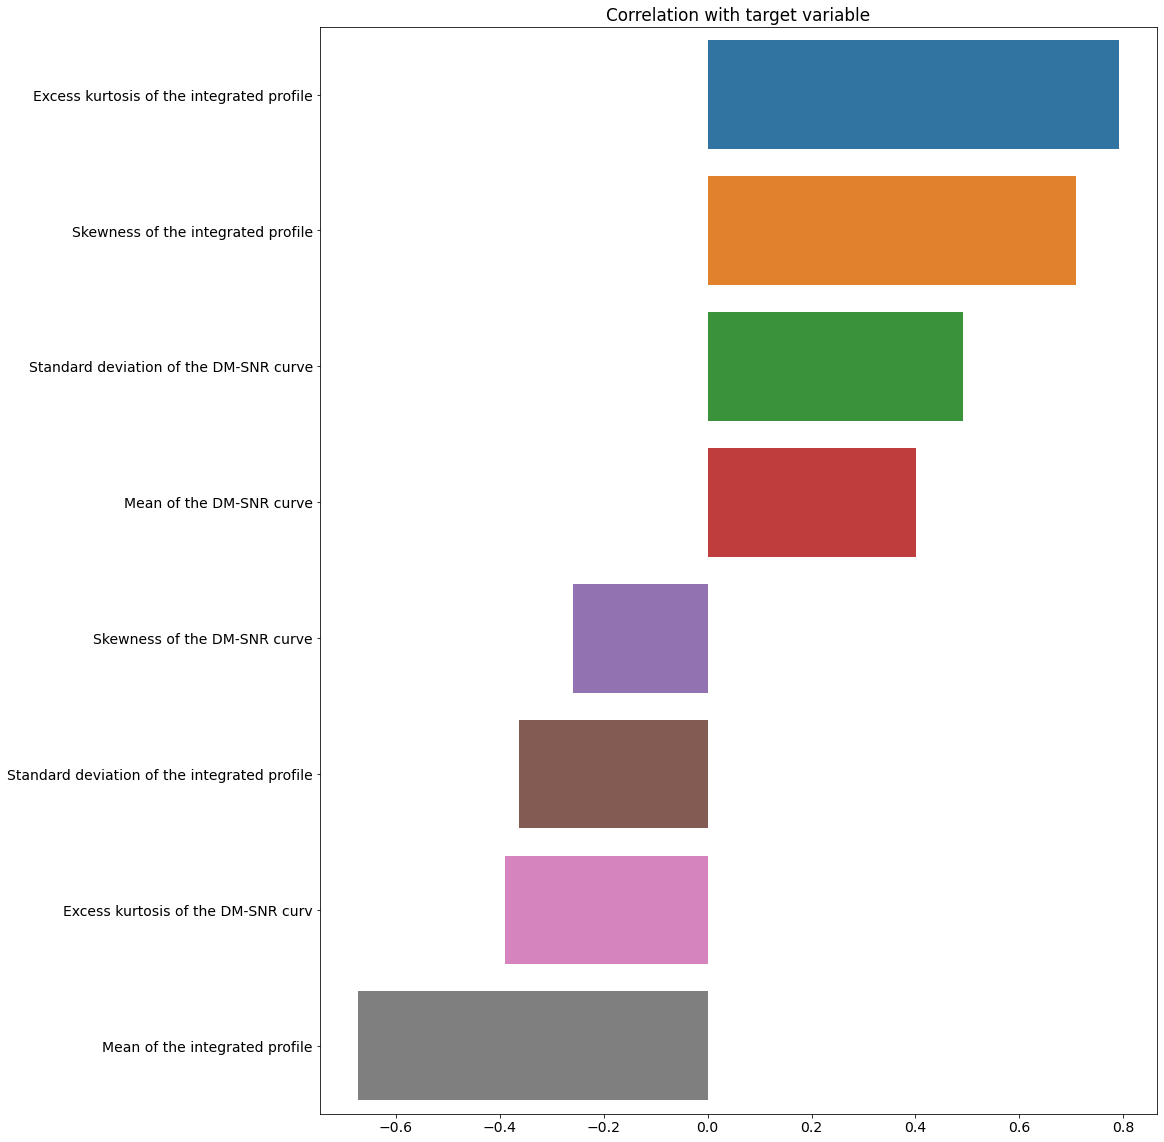

In [16]:
TARGET_NAME = 'target'

corr_with_target = data.corr()[TARGET_NAME].sort_values(ascending=False)[1:]
plt.figure(figsize=(15, 20))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

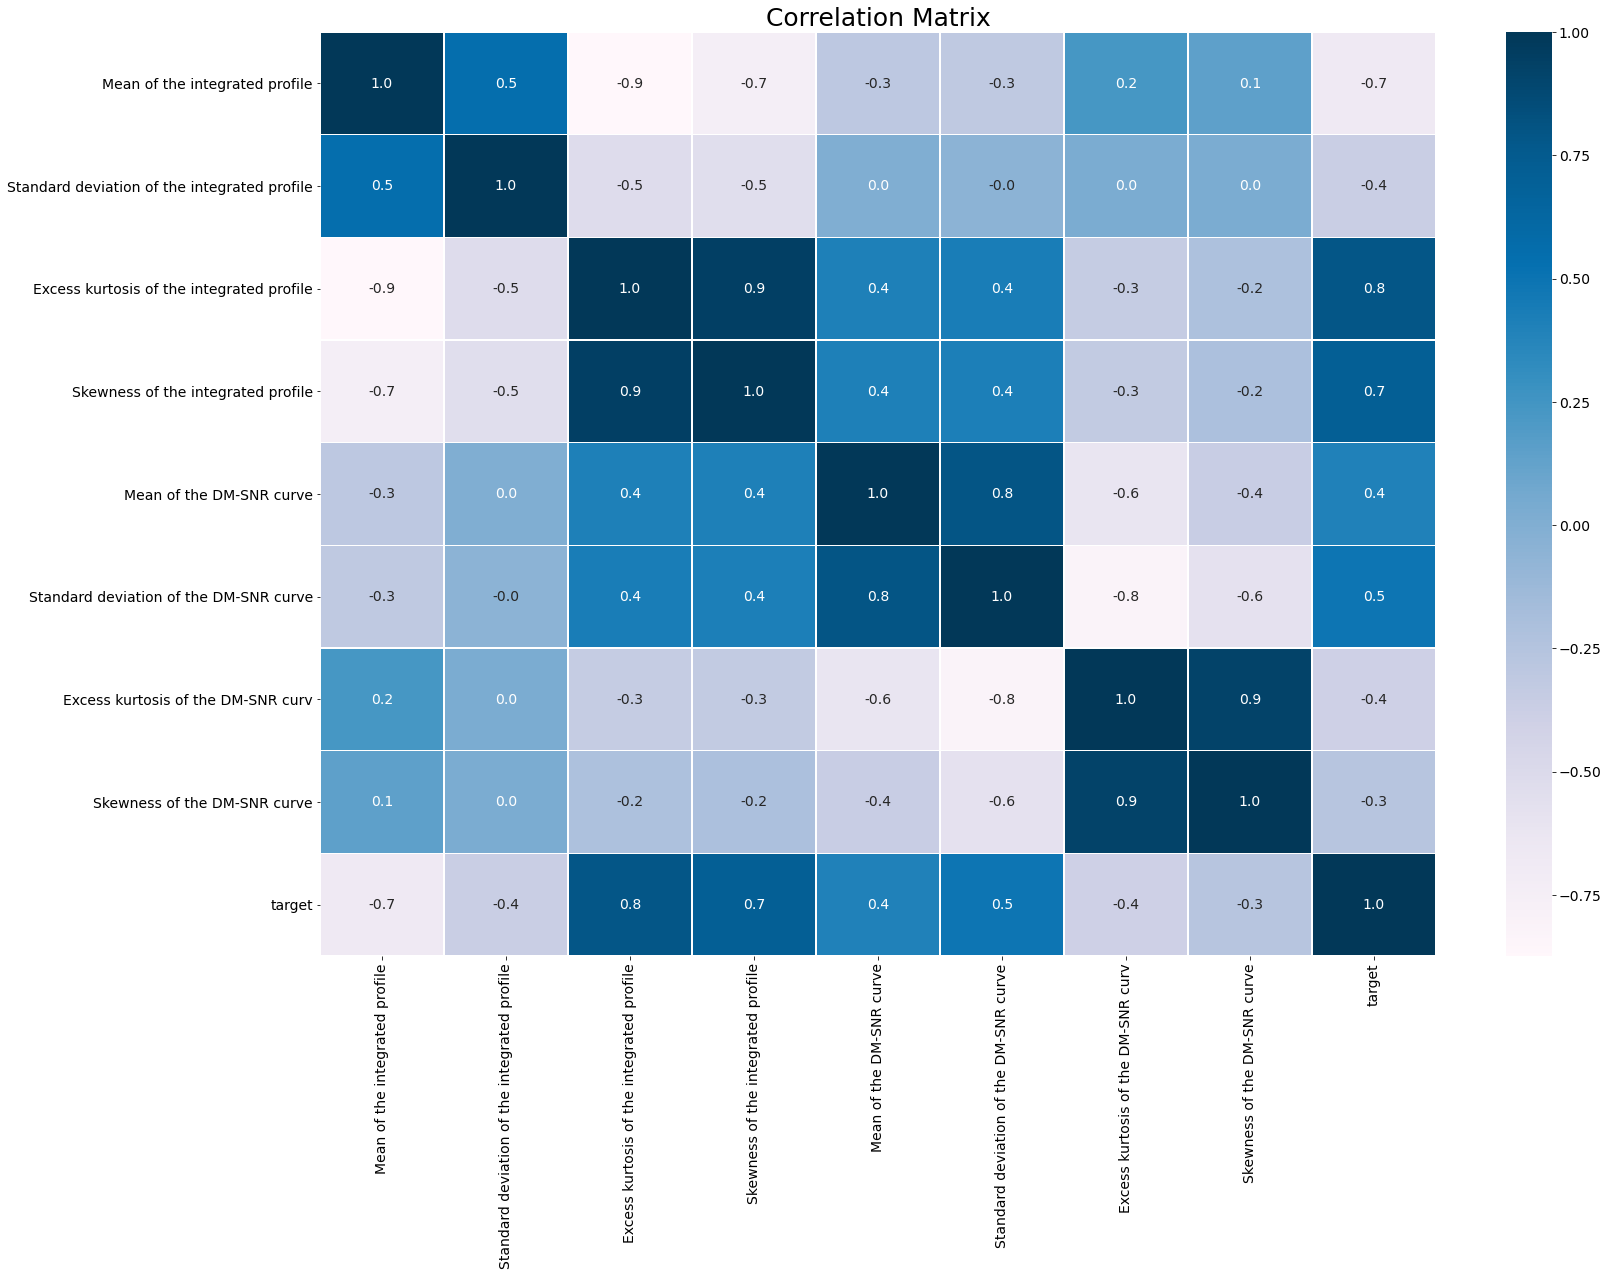

In [17]:
# Correlation Matrix
f, ax = plt.subplots(figsize = [25, 17])
sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'PuBu' )
ax.set_title('Correlation Matrix', fontsize=25)
plt.show()

### Feature engineering

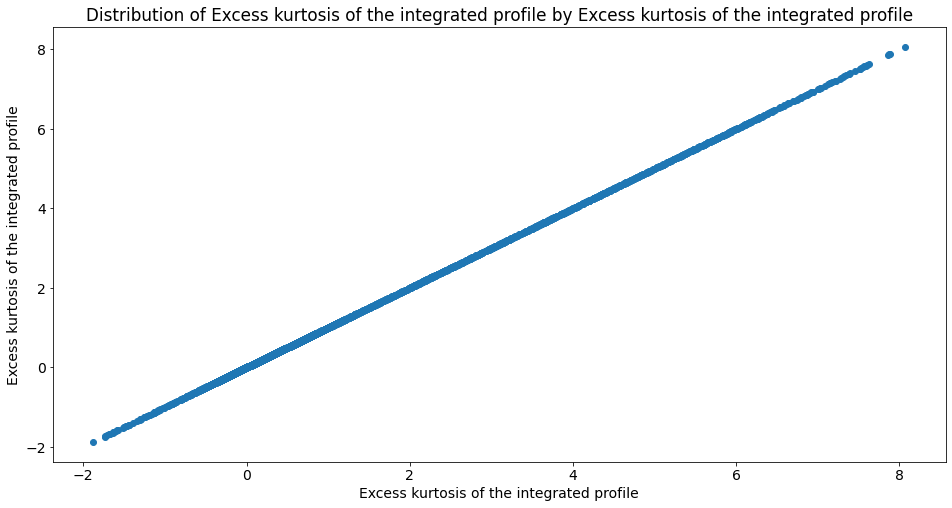

In [18]:
plt.figure(figsize = (16, 8))
plt.scatter(data['Excess kurtosis of the integrated profile'], data['Excess kurtosis of the integrated profile'])
plt.ylabel('Excess kurtosis of the integrated profile')
plt.xlabel('Excess kurtosis of the integrated profile')
plt.title('Distribution of Excess kurtosis of the integrated profile by Excess kurtosis of the integrated profile')
plt.show();

In [19]:
data['Excess kurtosis of the integrated profile'].describe([.01,.1,.25,.5,.75,.9,.91,.92,.93,.94,.95,.96])

count   17897.00000
mean        0.47790
std         1.06406
min        -1.87601
1%         -0.47919
10%        -0.13319
25%         0.02711
50%         0.22324
75%         0.47335
90%         0.89182
91%         1.01816
92%         1.21621
93%         1.61137
94%         2.13656
95%         2.70675
96%         3.34544
max         8.06952
Name: Excess kurtosis of the integrated profile, dtype: float64

### PyCaret 2 Classification

In [23]:
from pycaret.classification import *
# https://pycaret.org/guide/
# https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Classification.ipynb
# https://tproger.ru/translations/create-and-deploy-app-with-pycaret/

In [26]:
clf1 = setup(data = data, 
             target = 'target',
             silent = True)

,Description,Value
0,session_id,6672
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(17897, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare Baseline

In [27]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9804,0.9763,0.8489,0.9321,0.8880,0.8773,0.8788,13.9290
xgboost,Extreme Gradient Boosting,0.9800,0.9740,0.8455,0.9319,0.8860,0.8751,0.8767,0.8880
rf,Random Forest Classifier,0.9796,0.9681,0.8428,0.9296,0.8836,0.8725,0.8741,0.5960
lightgbm,Light Gradient Boosting Machine,0.9796,0.9759,0.8455,0.9276,0.8840,0.8728,0.8744,0.1160
et,Extra Trees Classifier,0.9790,0.9701,0.8333,0.9315,0.8792,0.8677,0.8696,0.2950
lr,Logistic Regression,0.9787,0.9750,0.8203,0.9408,0.8758,0.8642,0.8670,0.6590
ada,Ada Boost Classifier,0.9778,0.9761,0.8168,0.9340,0.8710,0.8589,0.8615,0.2300
gbc,Gradient Boosting Classifier,0.9770,0.9757,0.8411,0.9030,0.8704,0.8578,0.8588,0.8460
lda,Linear Discriminant Analysis,0.9747,0.9741,0.7656,0.9503,0.8475,0.8339,0.8400,0.0190
knn,K Neighbors Classifier,0.9724,0.9361,0.7838,0.9038,0.8387,0.8237,0.8267,0.0830


### Create Model

In [28]:
model_cbc = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9808,0.9765,0.8522,0.9333,0.8909,0.8804,0.8815
1,0.9856,0.9868,0.8696,0.9709,0.9174,0.9096,0.9112
2,0.9808,0.9837,0.8522,0.9333,0.8909,0.8804,0.8815
3,0.9785,0.9680,0.8261,0.9314,0.8756,0.8638,0.8657
4,0.9777,0.9712,0.8348,0.9143,0.8727,0.8605,0.8616
5,0.9816,0.9733,0.8448,0.9515,0.8950,0.8850,0.8868
6,0.9792,0.9751,0.8966,0.8814,0.8889,0.8774,0.8775
7,0.9888,0.9933,0.9217,0.9550,0.9381,0.9319,0.9321
8,0.9760,0.9735,0.7826,0.9474,0.8571,0.8442,0.8488
9,0.9744,0.9613,0.8087,0.9029,0.8532,0.8393,0.8408


### Tune Hyperparameters

In [29]:
tuned_cbc = tune_model(model_cbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9800,0.9745,0.8435,0.9327,0.8858,0.8749,0.8763
1,0.9864,0.9858,0.8783,0.9712,0.9224,0.9150,0.9163
2,0.9832,0.9834,0.8522,0.9608,0.9032,0.8941,0.8960
3,0.9785,0.9730,0.8174,0.9400,0.8744,0.8627,0.8652
4,0.9792,0.9715,0.8348,0.9320,0.8807,0.8694,0.8710
5,0.9808,0.9731,0.8362,0.9510,0.8899,0.8795,0.8816
6,0.9800,0.9773,0.8879,0.8957,0.8918,0.8808,0.8808
7,0.9888,0.9923,0.9217,0.9550,0.9381,0.9319,0.9321
8,0.9760,0.9740,0.7826,0.9474,0.8571,0.8442,0.8488
9,0.9744,0.9703,0.8087,0.9029,0.8532,0.8393,0.8408


### Analyze Model

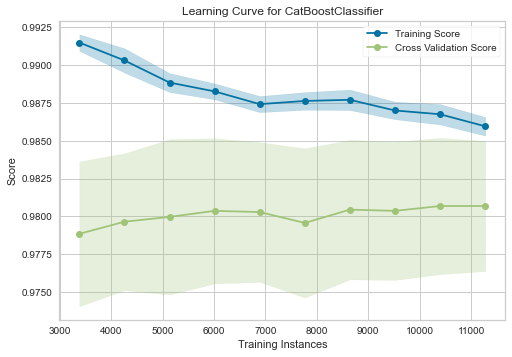

In [30]:
# Learning Curve
plot_model(estimator = tuned_cbc, plot = 'learning')

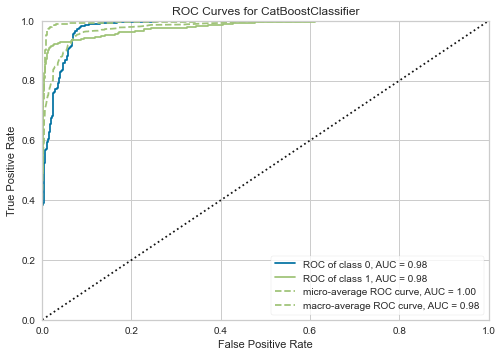

In [31]:
# AUC Curve
plot_model(estimator = tuned_cbc, plot = 'auc')

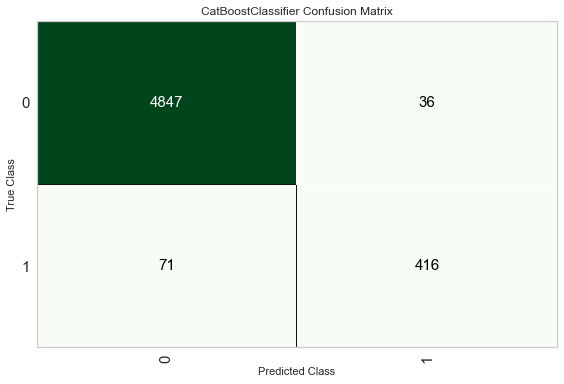

In [32]:
# Confusion Matrix
plot_model(estimator = tuned_cbc, plot = 'confusion_matrix')

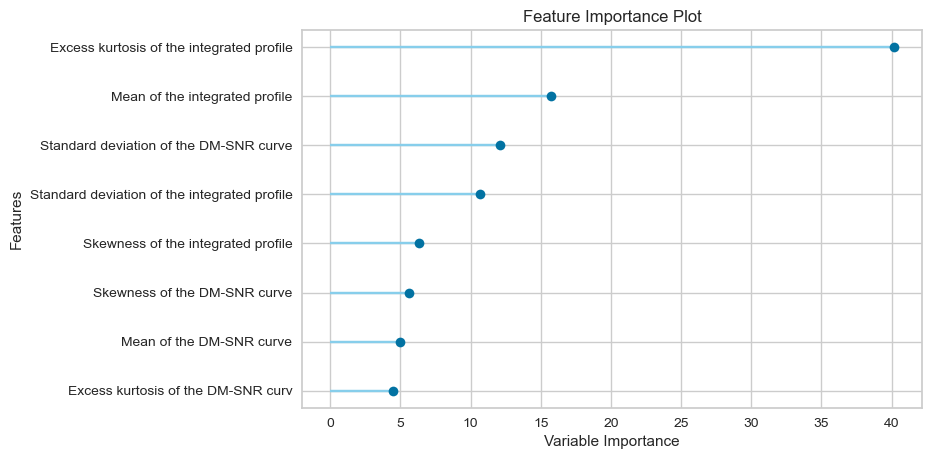

In [33]:
# Feature Importance
plot_model(estimator = tuned_cbc, plot = 'feature')

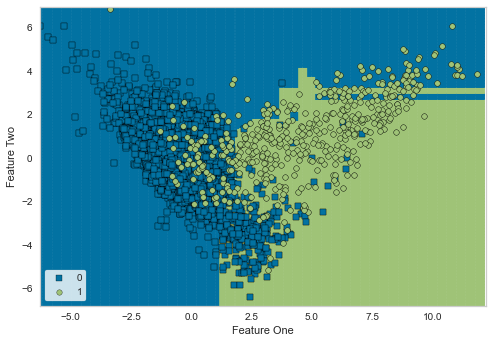

In [34]:
plot_model(tuned_cbc, plot = 'boundary')

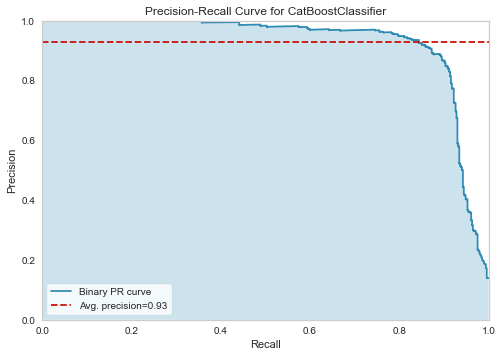

In [35]:
plot_model(tuned_cbc, plot = 'pr')

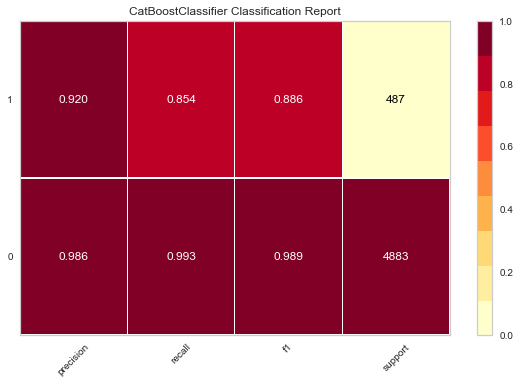

In [36]:
plot_model(tuned_cbc, plot = 'class_report')

In [37]:
evaluate_model(tuned_cbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Interpret Model

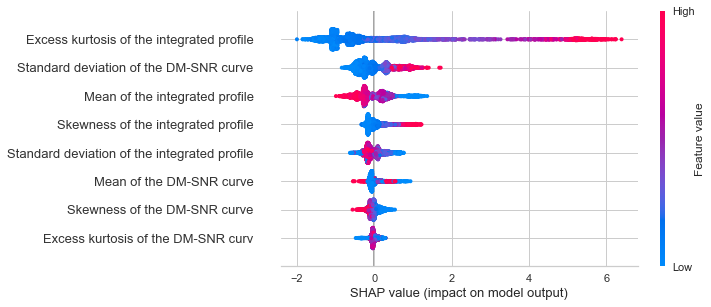

In [38]:
interpret_model(tuned_cbc)

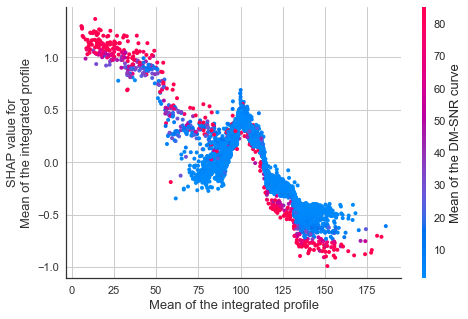

In [39]:
interpret_model(tuned_cbc, plot = 'correlation')

### Predict Model

In [41]:
predictions = predict_model(tuned_cbc)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9801,0.9805,0.8542,0.9204,0.8860,0.8751,0.8759


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curv,Skewness of the DM-SNR curve,target,Label,Score
0,124.27344,53.45306,0.04793,-0.52468,3.22575,15.25576,7.41510,80.41068,0,0,0.99840
1,130.76562,53.61108,0.10536,-0.05996,7.86873,34.96071,4.81593,23.32428,0,0,0.99650
2,113.27344,51.72263,0.22347,-0.32327,9.01672,43.23164,4.60164,19.25739,0,0,0.99080
3,138.71094,44.95417,-0.05543,0.39495,1.07274,11.37101,14.26188,252.17697,0,0,0.99860
4,99.67969,51.39308,0.51087,-0.40203,5.70318,23.60998,5.28557,32.43966,0,0,0.96410


### Save / Load Model

In [43]:
save_model(tuned_cbc, model_name='model_cbc')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='target')),
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', 